In [68]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [69]:
for i in range(8):
    if i==0:
        train = pd.read_pickle('salida/nuevo4d/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4d/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            print(i+1)

In [70]:
train=train.reset_index(drop=True)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,0.000000,1.416,0.000,0.000000,0.000000,0.000000,3,0.000000,0,3,0,12,0.333333,0,,0,,0.0,YES
1,0.000000,0.000000,1.992,0.000,0.000000,0.000000,0.000000,4,0.000000,0,3,0,12,1.000000,0,,0,,0.0,NO
2,1.013060,2.930631,1.924,2.121,3.848347,0.005805,0.432101,3,0.125000,0,5,2,16,0.800000,0,,0,,0.0,UNKNOWN
3,0.000000,0.000000,2.163,0.000,0.000000,0.000000,0.000000,3,0.000000,0,3,0,19,1.000000,0,,0,,0.0,YES
4,1.615766,2.837574,2.219,2.399,4.286144,0.003260,0.690800,1,0.222222,0,3,2,9,0.600000,0,,0,,0.0,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,0.000000,1.742,0.000,0.000000,0.000000,0.000000,6,0.000000,0,5,0,11,0.200000,0,,0,,0.0,UNKNOWN
796,0.000000,0.000000,1.571,0.000,0.000000,0.000000,0.000000,8,0.000000,0,7,0,16,1.000000,0,,0,,0.0,YES
797,0.243011,2.452737,1.468,1.024,1.925829,0.024390,0.107793,1,0.166667,0,3,2,12,0.666667,0,,0,,0.0,UNKNOWN
798,0.000000,0.000000,2.295,0.000,0.000000,0.000000,0.000000,3,0.000000,0,3,0,10,0.400000,0,,0,,0.0,NO


<Axes: title={'center': 'Jaro-Winkler_rit'}, xlabel='clases'>

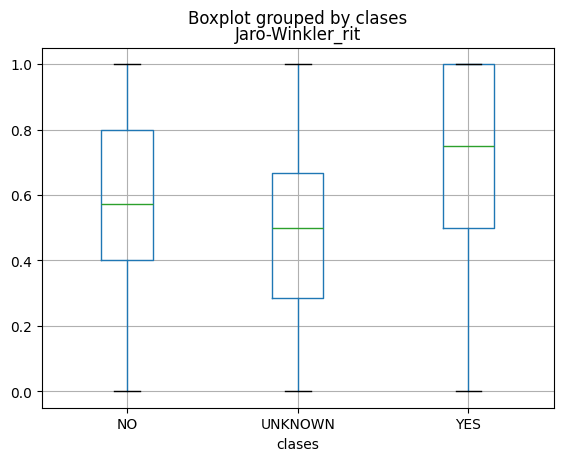

In [81]:
train.boxplot(by="clases",column=["Jaro-Winkler_rit"])

In [71]:
train["entropiaT"]=train["entropia_total"]-train["entropias"]

array([[<Axes: title={'center': 'entropia_total'}, xlabel='clases'>,
        <Axes: title={'center': 'entropias'}, xlabel='clases'>],
       [<Axes: title={'center': 'entropiaT'}, xlabel='clases'>, <Axes: >]],
      dtype=object)

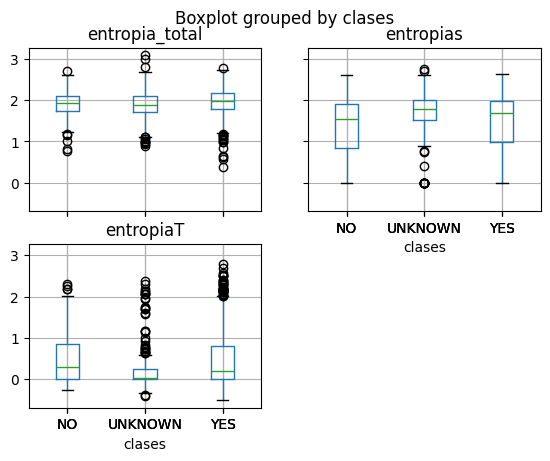

In [72]:
train.boxplot(by="clases",column=["entropia_total","entropias","entropiaT"])

## Eliminar características

In [5]:
# Diferencia entre entropia total - entropias y dejar la columna
# Quitar max_info_p
# revisar scaler y/o normalización de shape con total
#
#train=train.drop(["diferencias","list_m","list_M","list_T"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,0.000000,1.416,0.000,0.000000,0.000000,0.000000,3,0.000000,0,3,0,12,0.333333,0,,0,,0.0,YES
1,0.000000,0.000000,1.992,0.000,0.000000,0.000000,0.000000,4,0.000000,0,3,0,12,1.000000,0,,0,,0.0,NO
2,1.013060,2.930631,1.924,2.121,3.848347,0.005805,0.432101,3,0.125000,0,5,2,16,0.800000,0,,0,,0.0,UNKNOWN
3,0.000000,0.000000,2.163,0.000,0.000000,0.000000,0.000000,3,0.000000,0,3,0,19,1.000000,0,,0,,0.0,YES
4,1.615766,2.837574,2.219,2.399,4.286144,0.003260,0.690800,1,0.222222,0,3,2,9,0.600000,0,,0,,0.0,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,0.000000,1.742,0.000,0.000000,0.000000,0.000000,6,0.000000,0,5,0,11,0.200000,0,,0,,0.0,UNKNOWN
796,0.000000,0.000000,1.571,0.000,0.000000,0.000000,0.000000,8,0.000000,0,7,0,16,1.000000,0,,0,,0.0,YES
797,0.243011,2.452737,1.468,1.024,1.925829,0.024390,0.107793,1,0.166667,0,3,2,12,0.666667,0,,0,,0.0,UNKNOWN
798,0.000000,0.000000,2.295,0.000,0.000000,0.000000,0.000000,3,0.000000,0,3,0,10,0.400000,0,,0,,0.0,NO


In [6]:
train[(train["list_m"]!=0) & (train["clases"]=="YES")]

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases
4,1.615766,2.837574,2.219,2.399,4.286144,0.003260,0.690800,1,0.222222,0,3,2,9,0.600000,0,,0,,0.0,YES
6,1.117820,1.429326,1.777,1.784,3.641675,0.004853,0.312394,3,0.083333,0,4,1,12,0.571429,0,,0,,0.0,YES
12,0.609809,1.449391,1.925,1.296,3.797640,0.004267,0.123798,3,0.076923,0,4,1,13,1.000000,0,,0,,0.0,YES
16,1.652796,5.784747,2.040,2.034,4.521604,0.001095,0.819574,1,0.307692,0,5,4,13,0.714286,0,,0,,0.0,YES
23,1.509191,2.953140,2.204,2.327,4.298644,0.001719,0.769220,2,0.166667,0,4,2,12,0.833333,0,,0,,0.0,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,1.944841,1.428067,2.023,1.522,4.714801,0.000000,1.000000,5,0.071429,0,6,1,14,1.000000,0,,0,,0.0,YES
783,1.150541,5.751273,2.287,2.209,4.262429,0.002342,0.650986,1,0.571429,0,5,4,7,0.833333,0,,0,,0.0,YES
791,1.116025,1.452324,2.281,2.171,3.867028,0.003593,0.378576,4,0.100000,0,5,1,10,0.833333,1,make,0,,0.0,YES
794,1.260344,5.787282,1.784,1.811,4.295817,0.002257,0.645629,3,0.250000,0,7,4,16,0.769231,0,,0,,0.0,YES


In [7]:
train.columns

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'verbT',
       'negH', 'verbH', 'overlap_ent', 'clases'],
      dtype='object')

In [8]:
train=train.drop(["verbT","verbH"],axis=1)

In [9]:
#train = train[['list_incomp','list_incomp','Jaro-Winkler_rit','list_m','negT', 'negH','clases']]
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,0.000000,0.000000,1.416,0.000,0.000000,0.000000,0.000000,3,0.000000,0,3,0,12,0.333333,0,0,0.0,YES
1,0.000000,0.000000,1.992,0.000,0.000000,0.000000,0.000000,4,0.000000,0,3,0,12,1.000000,0,0,0.0,NO
2,1.013060,2.930631,1.924,2.121,3.848347,0.005805,0.432101,3,0.125000,0,5,2,16,0.800000,0,0,0.0,UNKNOWN
3,0.000000,0.000000,2.163,0.000,0.000000,0.000000,0.000000,3,0.000000,0,3,0,19,1.000000,0,0,0.0,YES
4,1.615766,2.837574,2.219,2.399,4.286144,0.003260,0.690800,1,0.222222,0,3,2,9,0.600000,0,0,0.0,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,0.000000,1.742,0.000,0.000000,0.000000,0.000000,6,0.000000,0,5,0,11,0.200000,0,0,0.0,UNKNOWN
796,0.000000,0.000000,1.571,0.000,0.000000,0.000000,0.000000,8,0.000000,0,7,0,16,1.000000,0,0,0.0,YES
797,0.243011,2.452737,1.468,1.024,1.925829,0.024390,0.107793,1,0.166667,0,3,2,12,0.666667,0,0,0.0,UNKNOWN
798,0.000000,0.000000,2.295,0.000,0.000000,0.000000,0.000000,3,0.000000,0,3,0,10,0.400000,0,0,0.0,NO


In [10]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [11]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['clases'],axis=1).corr(method='pearson')

In [12]:
train_m

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent
sumas,1.000000,0.240261,0.390214,0.723429,0.670427,-0.117400,0.826617,-0.230034,0.045405,0.049419,0.038128,0.227073,0.312071,0.051398,0.050426,-0.025423,NaN
distancias,0.240261,1.000000,-0.018304,0.551792,0.525450,0.211847,0.269460,-0.564641,0.793151,0.045851,0.551511,0.997867,-0.013577,-0.299157,-0.054241,-0.031321,NaN
entropia_total,0.390214,-0.018304,1.000000,0.393905,0.224900,-0.101468,0.312580,0.095336,0.024943,0.018149,0.072036,-0.043704,-0.065799,0.082937,0.078759,-0.006623,NaN
entropias,0.723429,0.551792,0.393905,1.000000,0.913040,0.142597,0.714355,-0.497176,0.447271,0.060057,0.115335,0.533708,-0.026293,-0.176196,-0.045027,-0.040444,NaN
mutinf,0.670427,0.525450,0.224900,0.913040,1.000000,0.112037,0.743971,-0.485042,0.400881,0.011762,0.097580,0.504229,-0.000074,-0.165696,-0.065245,-0.042546,NaN
mearts,-0.117400,0.211847,-0.101468,0.142597,0.112037,1.000000,-0.169687,-0.234912,0.221941,0.098420,0.027182,0.229955,-0.105067,-0.134048,-0.047976,-0.027160,NaN
max_info,0.826617,0.269460,0.312580,0.714355,0.743971,-0.169687,1.000000,-0.262911,0.172153,0.030945,0.039328,0.256944,0.066700,0.021771,-0.023337,-0.027950,NaN
list_comp,-0.230034,-0.564641,0.095336,-0.497176,-0.485042,-0.234912,-0.262911,1.000000,-0.482207,-0.023444,0.366375,-0.567274,0.078510,0.313164,0.097481,0.070095,NaN
diferencias,0.045405,0.793151,0.024943,0.447271,0.400881,0.221941,0.172153,-0.482207,1.000000,0.029004,0.408745,0.797719,-0.410534,-0.283291,-0.093617,-0.020581,NaN
list_incomp,0.049419,0.045851,0.018149,0.060057,0.011762,0.098420,0.030945,-0.023444,0.029004,1.000000,0.027890,0.050040,0.012574,-0.040284,0.050328,-0.011685,NaN


<Axes: >

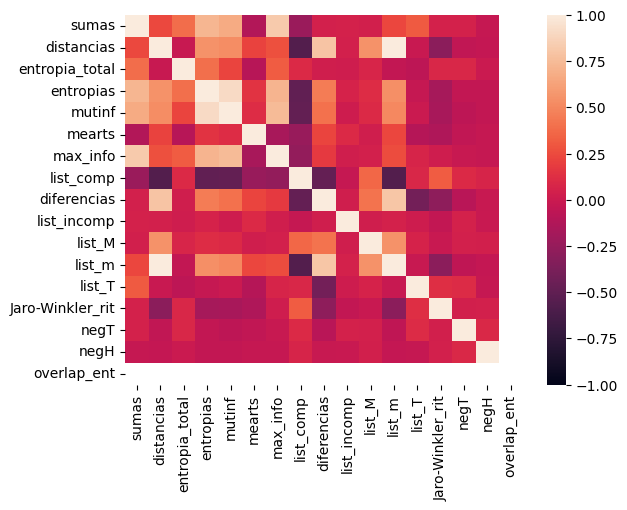

In [13]:
sns.heatmap(train_m,vmin=-1,vmax=1)

In [14]:
train_m

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent
sumas,1.000000,0.240261,0.390214,0.723429,0.670427,-0.117400,0.826617,-0.230034,0.045405,0.049419,0.038128,0.227073,0.312071,0.051398,0.050426,-0.025423,NaN
distancias,0.240261,1.000000,-0.018304,0.551792,0.525450,0.211847,0.269460,-0.564641,0.793151,0.045851,0.551511,0.997867,-0.013577,-0.299157,-0.054241,-0.031321,NaN
entropia_total,0.390214,-0.018304,1.000000,0.393905,0.224900,-0.101468,0.312580,0.095336,0.024943,0.018149,0.072036,-0.043704,-0.065799,0.082937,0.078759,-0.006623,NaN
entropias,0.723429,0.551792,0.393905,1.000000,0.913040,0.142597,0.714355,-0.497176,0.447271,0.060057,0.115335,0.533708,-0.026293,-0.176196,-0.045027,-0.040444,NaN
mutinf,0.670427,0.525450,0.224900,0.913040,1.000000,0.112037,0.743971,-0.485042,0.400881,0.011762,0.097580,0.504229,-0.000074,-0.165696,-0.065245,-0.042546,NaN
mearts,-0.117400,0.211847,-0.101468,0.142597,0.112037,1.000000,-0.169687,-0.234912,0.221941,0.098420,0.027182,0.229955,-0.105067,-0.134048,-0.047976,-0.027160,NaN
max_info,0.826617,0.269460,0.312580,0.714355,0.743971,-0.169687,1.000000,-0.262911,0.172153,0.030945,0.039328,0.256944,0.066700,0.021771,-0.023337,-0.027950,NaN
list_comp,-0.230034,-0.564641,0.095336,-0.497176,-0.485042,-0.234912,-0.262911,1.000000,-0.482207,-0.023444,0.366375,-0.567274,0.078510,0.313164,0.097481,0.070095,NaN
diferencias,0.045405,0.793151,0.024943,0.447271,0.400881,0.221941,0.172153,-0.482207,1.000000,0.029004,0.408745,0.797719,-0.410534,-0.283291,-0.093617,-0.020581,NaN
list_incomp,0.049419,0.045851,0.018149,0.060057,0.011762,0.098420,0.030945,-0.023444,0.029004,1.000000,0.027890,0.050040,0.012574,-0.040284,0.050328,-0.011685,NaN


In [15]:
# Checar variables colineales
#sns.relplot(data=train_m, x="sumas", y="Jaro-Winkler_rit")

In [16]:
# RTE3
y_train=[]
for i in y_:
    if i == "YES":
        y_train.append(1)
    elif i == "UNKNOWN":
        y_train.append(2)
    else:
        y_train.append(0)

In [17]:
y_train.count(0)

80

In [18]:
y_train.count(1)

412

In [19]:
y_train.count(2)

308

In [20]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

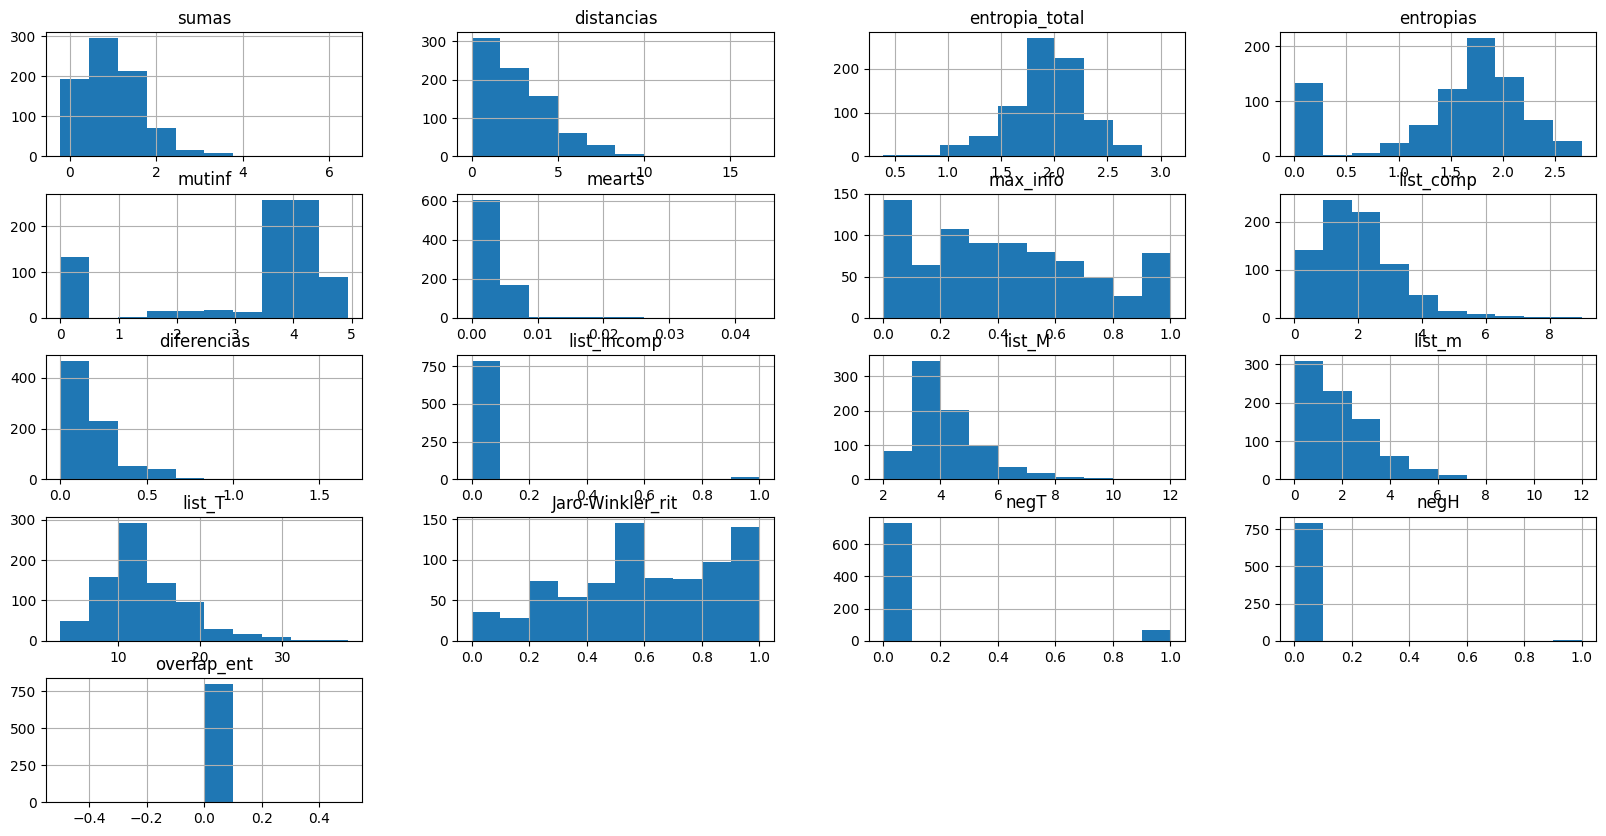

In [21]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [22]:
for i in range(8):
    if i==0:
        test = pd.read_pickle('salida/nuevo4d/RTE3/TEST_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4d/RTE3/TEST_'+str(i+1)+'.csv_.pickle')
            test=pd.concat([test,temp])
        except:
            print(i+1)

In [23]:
test = test.reset_index(drop=True)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,0.000000,2.285,0.000,0.000000e+00,0.000000,0.000000,4,0.000000,0,4,0,14,0.400000,0,,0,,0.0,YES
1,0.000000,0.000000,2.057,0.000,0.000000e+00,0.000000,0.000000,3,0.000000,0,3,0,14,0.800000,0,,0,,0.0,YES
2,0.498795,2.415953,0.469,0.469,1.969119e+00,0.000000,0.500000,0,0.400000,0,2,2,5,0.500000,0,,0,,0.0,YES
3,0.000000,1.000053,1.505,0.000,1.521449e-12,0.000000,0.000000,2,0.100000,0,3,1,10,0.666667,0,,0,,0.0,YES
4,0.294009,2.452995,1.515,1.319,1.940065e+00,0.002136,0.100528,1,0.200000,0,3,2,10,0.000000,0,,0,,0.0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.226224,2.910204,2.000,2.000,3.829676e+00,0.004296,0.538233,2,0.153846,1,4,2,13,0.400000,1,rush,0,,0.0,YES
796,1.186416,2.428087,1.629,1.356,2.338976e+00,0.000000,0.500000,1,0.166667,0,3,2,12,0.666667,0,,0,,0.0,NO
797,2.079727,1.439489,1.537,1.450,4.869917e+00,0.000000,1.000000,2,0.058824,0,3,1,17,0.000000,0,,0,,0.0,UNKNOWN
798,0.397318,2.863823,1.952,1.650,3.778098e+00,0.004712,0.183630,1,0.333333,0,3,2,6,0.500000,0,,0,,0.0,UNKNOWN


In [24]:
#test=test.drop(["diferencias","list_m","list_M","list_T"],axis=1)
#test = test[['list_incomp','list_incomp','Jaro-Winkler_rit','list_m','negT', 'negH','clases']]



In [25]:
test=test.drop(["verbT","verbH"],axis=1)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,0.000000,0.000000,2.285,0.000,0.000000e+00,0.000000,0.000000,4,0.000000,0,4,0,14,0.400000,0,0,0.0,YES
1,0.000000,0.000000,2.057,0.000,0.000000e+00,0.000000,0.000000,3,0.000000,0,3,0,14,0.800000,0,0,0.0,YES
2,0.498795,2.415953,0.469,0.469,1.969119e+00,0.000000,0.500000,0,0.400000,0,2,2,5,0.500000,0,0,0.0,YES
3,0.000000,1.000053,1.505,0.000,1.521449e-12,0.000000,0.000000,2,0.100000,0,3,1,10,0.666667,0,0,0.0,YES
4,0.294009,2.452995,1.515,1.319,1.940065e+00,0.002136,0.100528,1,0.200000,0,3,2,10,0.000000,0,0,0.0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.226224,2.910204,2.000,2.000,3.829676e+00,0.004296,0.538233,2,0.153846,1,4,2,13,0.400000,1,0,0.0,YES
796,1.186416,2.428087,1.629,1.356,2.338976e+00,0.000000,0.500000,1,0.166667,0,3,2,12,0.666667,0,0,0.0,NO
797,2.079727,1.439489,1.537,1.450,4.869917e+00,0.000000,1.000000,2,0.058824,0,3,1,17,0.000000,0,0,0.0,UNKNOWN
798,0.397318,2.863823,1.952,1.650,3.778098e+00,0.004712,0.183630,1,0.333333,0,3,2,6,0.500000,0,0,0.0,UNKNOWN


In [26]:
test[(test["list_m"]==0) & (test["clases"]=="NO")].shape

(15, 18)

In [27]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [28]:
# RTE3
y_test=[]
for i in y_t:
    if i == "YES":
        y_test.append(1)
    elif i == "UNKNOWN":
        y_test.append(2)
    else:
        y_test.append(0)

In [29]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [30]:
X_train = np.where(np.isnan(X_train), 0, X_train)
X_train

array([[0.        , 0.        , 0.45795602, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.64424321, ..., 0.        , 0.        ,
        0.        ],
       [0.15750671, 0.17570058, 0.62225097, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.03778238, 0.14704933, 0.47477361, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.74223803, ..., 0.        , 0.        ,
        0.        ],
       [0.12757006, 0.08560932, 0.68919793, ..., 0.        , 0.        ,
        0.        ]])

In [31]:
X_train.shape

(800, 17)

In [32]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [33]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [34]:
model.decision_function(X_train)

array([[-0.40491453,  0.65580124, -0.25088671],
       [-0.55498293,  1.52455044, -0.96956752],
       [-1.18352831,  0.93708355,  0.24644476],
       ...,
       [-1.08207331,  0.21548305,  0.86659026],
       [-0.50588583,  0.85308606, -0.34720023],
       [-1.02061051,  0.99095478,  0.02965573]])

In [35]:
labels=train.columns[:-1]
labels

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'negH',
       'overlap_ent'],
      dtype='object')

In [36]:
model.classes_

array([0, 1, 2])

In [37]:
model.coef_[0]

array([ 0.07653811, -0.6050966 , -0.5278763 , -0.3613424 , -0.37922319,
       -0.06986517,  0.68470394,  0.71792585, -0.32680417,  0.81133671,
        0.04495011, -0.46036941, -1.18264696, -0.19725201,  0.44609877,
        1.03800719,  0.        ])

In [38]:
coeficientes=model.coef_[0]

In [39]:
coeficientes

array([ 0.07653811, -0.6050966 , -0.5278763 , -0.3613424 , -0.37922319,
       -0.06986517,  0.68470394,  0.71792585, -0.32680417,  0.81133671,
        0.04495011, -0.46036941, -1.18264696, -0.19725201,  0.44609877,
        1.03800719,  0.        ])

In [40]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  15 negH 12 list_T


In [41]:

n_columns=train.shape[1]-1

In [42]:
n_columns

17

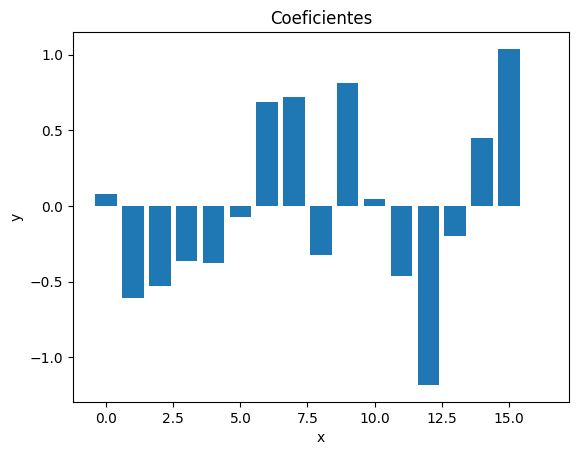

In [43]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [44]:
X_test = np.where(np.isnan(X_test), 0, X_test)
X_test

array([[0.        , 0.        , 0.74140169, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.66742375, ..., 0.        , 0.        ,
        0.        ],
       [0.12756476, 0.15016403, 0.15217391, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.53188143, 0.08947171, 0.49870214, ..., 0.        , 0.        ,
        0.        ],
       [0.10161237, 0.17800145, 0.63335496, ..., 0.        , 0.        ,
        0.        ],
       [0.44320744, 0.08977001, 0.7761194 , ..., 0.        , 0.        ,
        0.        ]])

In [45]:
X_test.shape

(800, 17)

In [46]:
predictions = model.predict(X_test)

In [47]:
predictions

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2,

In [48]:
test["predicciones"]=predictions
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases,predicciones
0,0.000000,0.000000,2.285,0.000,0.000000e+00,0.000000,0.000000,4,0.000000,0,4,0,14,0.400000,0,0,0.0,YES,1
1,0.000000,0.000000,2.057,0.000,0.000000e+00,0.000000,0.000000,3,0.000000,0,3,0,14,0.800000,0,0,0.0,YES,1
2,0.498795,2.415953,0.469,0.469,1.969119e+00,0.000000,0.500000,0,0.400000,0,2,2,5,0.500000,0,0,0.0,YES,1
3,0.000000,1.000053,1.505,0.000,1.521449e-12,0.000000,0.000000,2,0.100000,0,3,1,10,0.666667,0,0,0.0,YES,1
4,0.294009,2.452995,1.515,1.319,1.940065e+00,0.002136,0.100528,1,0.200000,0,3,2,10,0.000000,0,0,0.0,NO,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.226224,2.910204,2.000,2.000,3.829676e+00,0.004296,0.538233,2,0.153846,1,4,2,13,0.400000,1,0,0.0,YES,0
796,1.186416,2.428087,1.629,1.356,2.338976e+00,0.000000,0.500000,1,0.166667,0,3,2,12,0.666667,0,0,0.0,NO,1
797,2.079727,1.439489,1.537,1.450,4.869917e+00,0.000000,1.000000,2,0.058824,0,3,1,17,0.000000,0,0,0.0,UNKNOWN,1
798,0.397318,2.863823,1.952,1.650,3.778098e+00,0.004712,0.183630,1,0.333333,0,3,2,6,0.500000,0,0,0.0,UNKNOWN,2


In [49]:
incorrectos = test[(test["clases"]=="YES") & (test["predicciones"]==0)]
incorrectos

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases,predicciones
288,0.799204,1.440738,2.064,1.842,3.693622,0.005520,0.343506,2,0.142857,0,3,1,7,0.800000,1,1,0.0,YES,0
375,1.637210,2.828574,2.109,1.957,4.394401,0.001589,0.881606,1,0.200000,1,3,2,10,0.666667,1,0,0.0,YES,0
795,1.226224,2.910204,2.000,2.000,3.829676,0.004296,0.538233,2,0.153846,1,4,2,13,0.400000,1,0,0.0,YES,0


In [50]:
print(confusion_matrix(y_test, predictions))

[[  2  59  11]
 [  3 358  49]
 [  2 195 121]]


In [51]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions,average="weighted"),2))
print("recall",round(recall_score(y_test,predictions,average="weighted"),2))
print("f1_score: ",round(f1_score(y_test,predictions,average="weighted"),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.6
precision:  0.59
recall 0.6
f1_score:  0.56
matthews_score:  0.26


In [52]:
X_train.shape

(800, 17)

In [53]:
X_test.shape

(800, 17)

In [54]:
test=test.drop(["predicciones"],axis=1)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,0.000000,0.000000,2.285,0.000,0.000000e+00,0.000000,0.000000,4,0.000000,0,4,0,14,0.400000,0,0,0.0,YES
1,0.000000,0.000000,2.057,0.000,0.000000e+00,0.000000,0.000000,3,0.000000,0,3,0,14,0.800000,0,0,0.0,YES
2,0.498795,2.415953,0.469,0.469,1.969119e+00,0.000000,0.500000,0,0.400000,0,2,2,5,0.500000,0,0,0.0,YES
3,0.000000,1.000053,1.505,0.000,1.521449e-12,0.000000,0.000000,2,0.100000,0,3,1,10,0.666667,0,0,0.0,YES
4,0.294009,2.452995,1.515,1.319,1.940065e+00,0.002136,0.100528,1,0.200000,0,3,2,10,0.000000,0,0,0.0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.226224,2.910204,2.000,2.000,3.829676e+00,0.004296,0.538233,2,0.153846,1,4,2,13,0.400000,1,0,0.0,YES
796,1.186416,2.428087,1.629,1.356,2.338976e+00,0.000000,0.500000,1,0.166667,0,3,2,12,0.666667,0,0,0.0,NO
797,2.079727,1.439489,1.537,1.450,4.869917e+00,0.000000,1.000000,2,0.058824,0,3,1,17,0.000000,0,0,0.0,UNKNOWN
798,0.397318,2.863823,1.952,1.650,3.778098e+00,0.004712,0.183630,1,0.333333,0,3,2,6,0.500000,0,0,0.0,UNKNOWN


In [55]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [56]:
#validation_size = 0.20
#X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)
X_train_cv=X_cv
Y_train_cv=Y_cv

In [57]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_weighted')
msg += "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_weighted')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_weighted')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/anaconda3/envs/rit/lib/python3.9/s

Logistic Regression Acurracy:: 0.620000 (0.103628)
Logistic Regression Precision:: 0.560000 (0.142224)
Logistic Regression Recall:: 0.620000 (0.103628)
Logistic Regression F1-score:: 0.580000 (0.127538)


In [58]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_macro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_macro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_macro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/anaconda3/envs/rit/lib/python3.9/s


Logistic Regression Precision:: 0.400000 (0.084543)
Logistic Regression Recall:: 0.430000 (0.064099)
Logistic Regression F1-score:: 0.410000 (0.076702)


In [59]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_micro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_micro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_micro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.610000 (0.096827)
Logistic Regression Recall:: 0.610000 (0.096827)
Logistic Regression F1-score:: 0.610000 (0.096827)


In [60]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.260000 (0.193680)


In [56]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [119]:
#linear_model

In [120]:
# model = LogisticRegression()
# model.fit(X_train,y_train)

In [61]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict))

              precision    recall  f1-score   support

           0       0.29      0.03      0.05        72
           1       0.58      0.87      0.70       410
           2       0.67      0.38      0.48       318

    accuracy                           0.60       800
   macro avg       0.51      0.43      0.41       800
weighted avg       0.59      0.60      0.56       800



In [62]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-2])
shap_values = explainer(X_test)

In [63]:
test.columns[:-2]

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'negH',
       'overlap_ent'],
      dtype='object')

In [64]:
explainer.expected_value

array([-0.98752318,  0.54185462,  0.44566856])

In [65]:
X_test

array([[0.        , 0.        , 0.75524712, ..., 0.        , 0.        ,
        0.66666667],
       [0.        , 0.        , 0.70040623, ..., 0.        , 0.        ,
        0.33333333],
       [0.        , 0.        , 0.59749492, ..., 0.        , 0.        ,
        0.66666667],
       ...,
       [0.        , 0.        , 0.61882194, ..., 0.        , 0.        ,
        0.66666667],
       [0.06309664, 0.14040234, 0.59817197, ..., 0.        , 0.        ,
        0.66666667],
       [0.        , 0.        , 0.859174  , ..., 0.        , 0.        ,
        1.        ]])

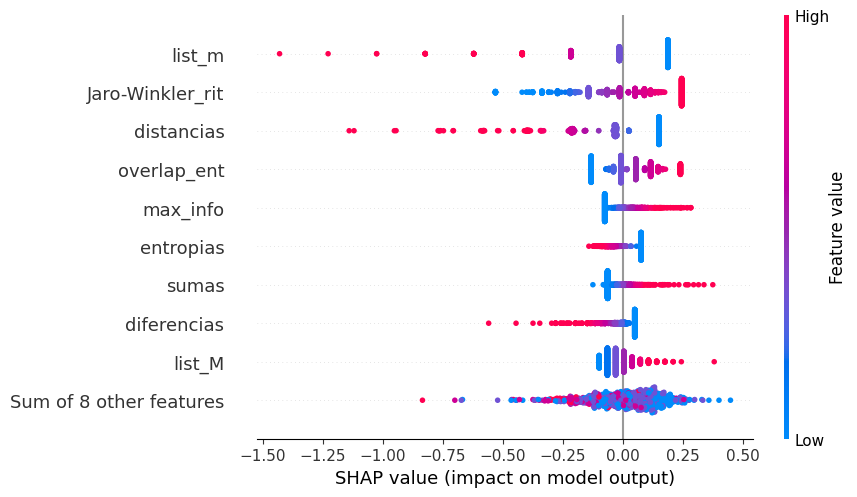

In [67]:
shap.plots.beeswarm(shap_values[:,:,1])

In [68]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

[0.         0.         0.44482058 0.         0.         0.
 0.         0.16666667 0.         0.         0.29411765 0.
 0.39285714 1.         0.         0.        ] 2 1


TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[0]).

[0.         0.         0.57684496 0.         0.         0.
 0.         0.         0.         0.         0.29411765 0.
 0.42857143 1.         0.         0.        ]


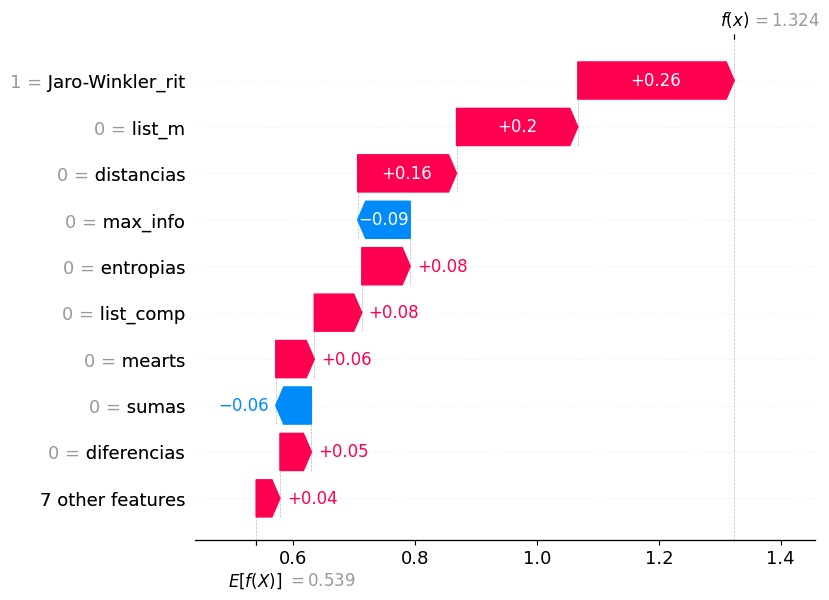

In [69]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

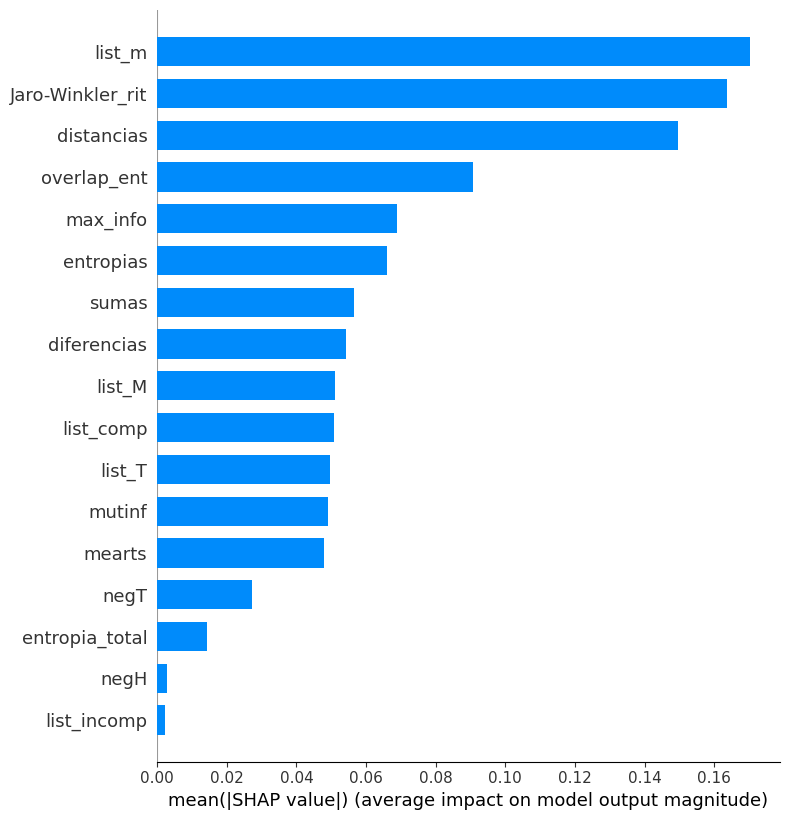

In [71]:
shap.summary_plot(shap_values[:,:,1], X_test,plot_type="bar")

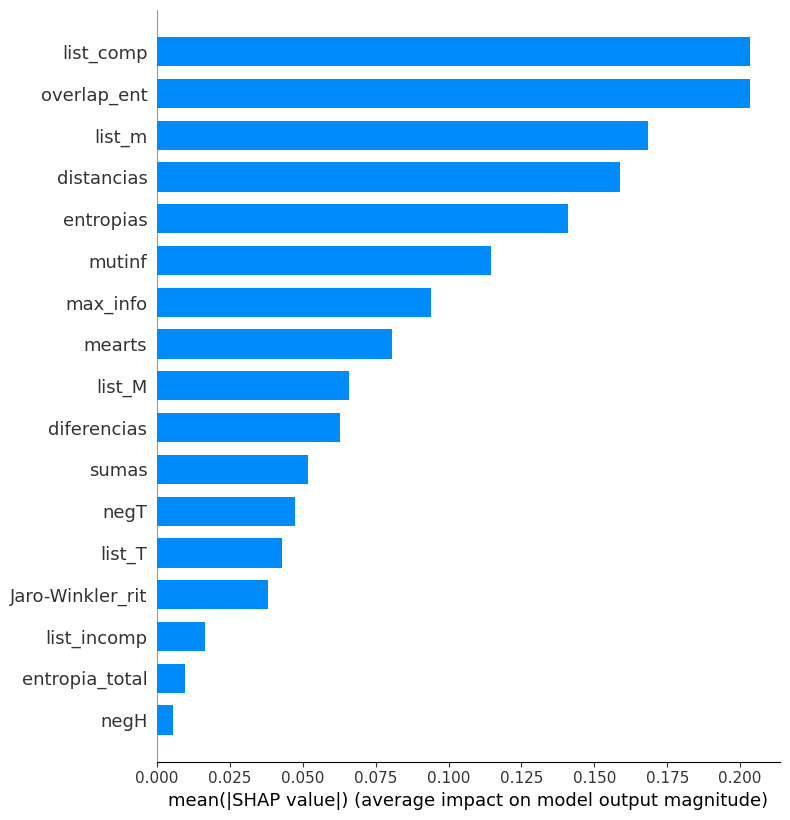

In [72]:
shap.summary_plot(shap_values[:,:,2], X_test,plot_type="bar")

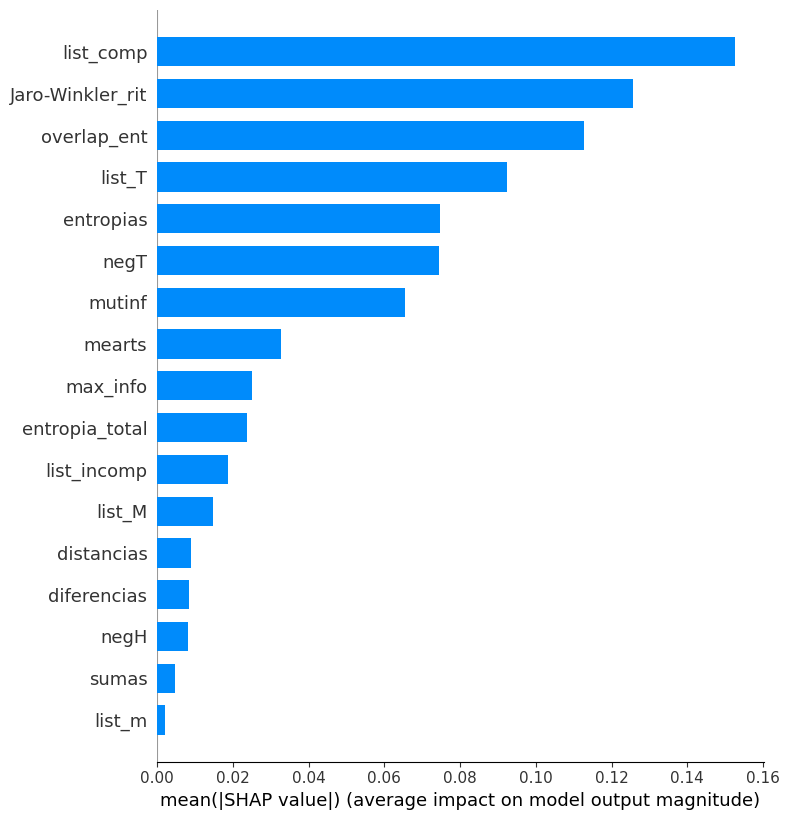

In [73]:
shap.summary_plot(shap_values[:,:,0], X_test,plot_type="bar")

In [68]:
shap.summary_plot(shap_values[:,:1], X_test[1:,])

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

IndexError: index 799 is out of bounds for axis 0 with size 798

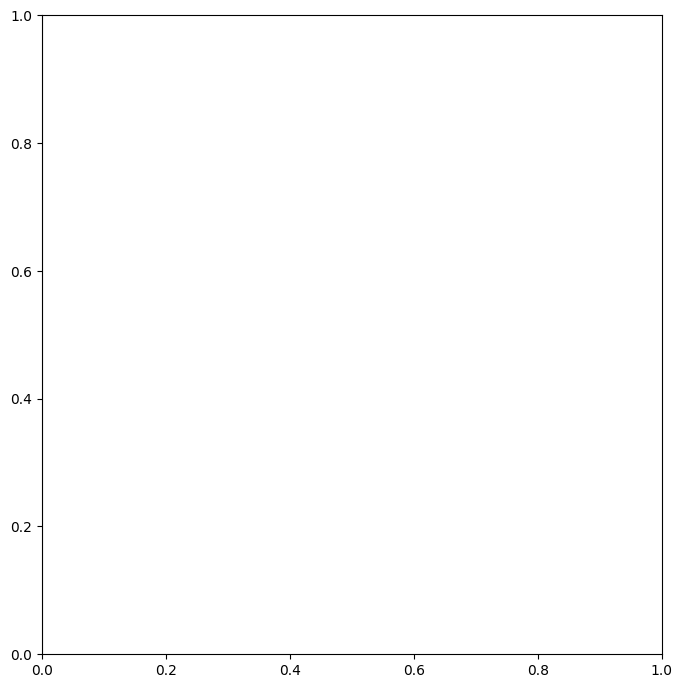

In [70]:
shap.summary_plot(shap_values[:,:,1], X_test[:-2],feature_names=test.columns[:-2])

In [ ]:
shap_values[2:,]

.values =
array([[ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [-0.01299836, -0.11268555, -0.4045574 ,  0.04382668,  0.21114683],
       ...,
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683]])

.base_values =
array([-0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.745

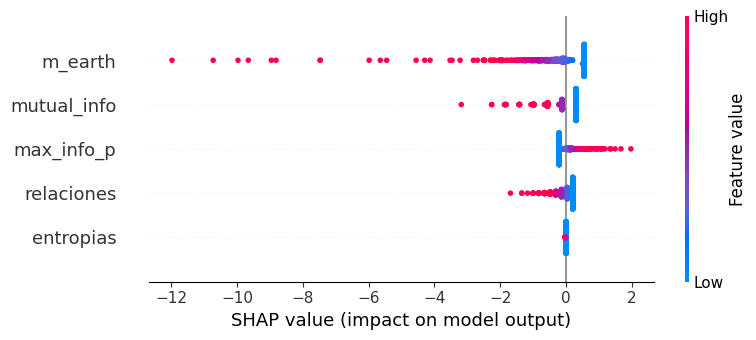

In [ ]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.7454438806409415

In [ ]:
shap_values.shape

(800, 5)

# Árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
clf = DecisionTreeClassifier(splitter="random")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.58
precision:  0.63
recall 0.42
f1_score:  0.51
matthews_score:  0.17


In [ ]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [ ]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.550000 (0.081558)
DecisionTree: 0.670000 (0.067294)
DecisionTree: 0.580000 (0.060962)


In [ ]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred)

array([[287, 103],
       [236, 174]])

Profundidad del árbol: 23
Número de nodos terminales: 152


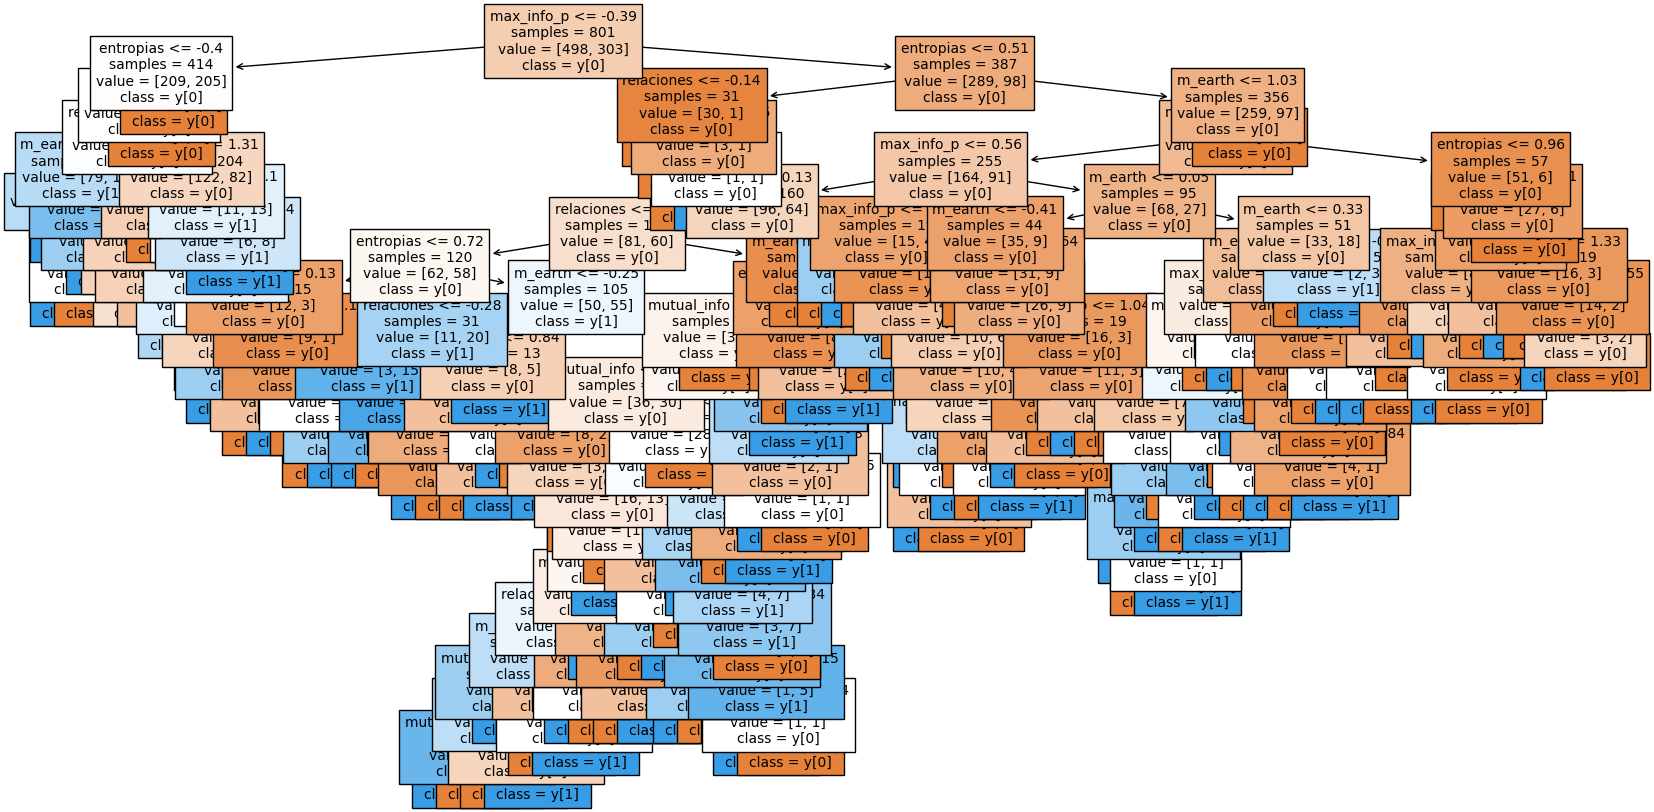

In [ ]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )